# HW 12

### Question 1
$x = \begin{bmatrix} 1\\
                     2\\
                     3\\
     \end{bmatrix}\;\;
y = \begin{bmatrix} 3\\
                     2\\
                     1\\
     \end{bmatrix}\;\;$



#### Part A
$x \succeq_{R^3} y$ if and only if $x_i \geq y_i$ for each i = 1,2,3. We can clearly see that $x_1 \ngeq y_1$ and thus, $x \nsucceq_{R^3} y $.  
$x-y = \begin{bmatrix} -2\\
                     0\\
                     2\\
     \end{bmatrix}\;\;$  
  
Below is the graph of $x-y$ in $R^3_+.$

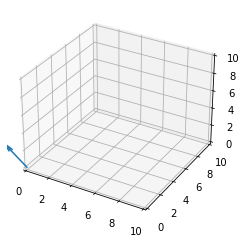

In [1]:
import matplotlib.pyplot as plt
z = [-2,0,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0,10])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2],z[0],z[1],z[2])

#### Part B
$x \succeq_{L^3} y$ if and only if $\sqrt{(x_1-y_1)^2 + (x_2-y_2)^2} \leq x_3-y_3$  

$\sqrt{(1-3)^2 + (2-2)^2} \leq 3-1$  
$\sqrt{4} \leq 2$   
$2\leq 2$ 

Since $\sqrt{(x_1-y_1)^2 + (x_2-y_2)^2}\leq x_3-y_3$ is true, we can conclude that $x \succeq_{L^3} y$

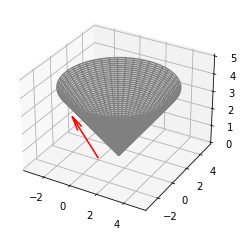

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


# xyz position of tip of cone, radius of the end of the cone, and height of the cone
radi = 4
height = 4
a=1 #x
b=1 #y
c=0 #z
choose=max(radi,height)

# Set up the grid in polar
theta = np.linspace(0,2*np.pi,90)
r = np.linspace(0,choose,50)
T, R = np.meshgrid(theta, r)

# Then calculate X, Y, and Z
X = R * np.cos(T) + a
Y = R * np.sin(T) + b
Z = (np.sqrt((X-a)**2 + (Y-b)**2)/(radi/height)) + c

# Plot the cone
ax.plot_wireframe(X, Y, Z, color='grey')

# Plot vector z = x-y
ax.quiver(start[0],start[1],start[2],z[0],z[1],z[2], color='r')

ax.set_zlim(0,5)
plt.show()

#### Part C  
$A = \begin{bmatrix}-6&7&8\\7&-8&9\\8&9&10\\\end{bmatrix}\;\;$
$B = \begin{bmatrix}0&1&2\\1&2&3\\2&3&14\\\end{bmatrix}\;\;$
$C = \begin{bmatrix}-10&9&8\\9&8&7\\8&7&12\\\end{bmatrix}$

$A\preceq_{S^3_+}B \longrightarrow B-A\succeq_{S^3_+}0$  
$A\succeq_{S^3_+}C \longrightarrow A-C\succeq_{S^3_+}0$

$B-A = \begin{bmatrix}6&-6&-6\\-6&10&-6\\-6&-6&4\\\end{bmatrix}\;\;\;\;\;\;$
$A-C = \begin{bmatrix}4&-2&0\\-2&-16&2\\0&2&-2\\\end{bmatrix}\;\;$


First, check if the matricies are positive semidefinite by calculating their eigenvalues.

In [3]:
from numpy import linalg

A = np.array([[-6,7,8], 
              [7,-8,9],
              [8,9,10]])
B = np.array([[0,1,2], 
              [1,2,3],
              [2,3,14]])
C = np.array([[-10,9,8], 
              [9,8,7],
              [8,7,12]])

A_EV = linalg.eig(A)
B_EV = linalg.eig(B)
C_EV = linalg.eig(C)
BA_EV = linalg.eig(B-A)
AC_EV = linalg.eig(A-C)


print("A Eigenvalues: " + str(A_EV[0]))
print("B Eigenvalues: " + str(B_EV[0]))
print("C Eigenvalues: " + str(C_EV[0]))
print("B-A Eigenvalues: " + str(BA_EV[0]))
print("A-C Eigenvalues: " + str(AC_EV[0]))

A Eigenvalues: [ 18.0192512   -7.77830432 -14.24094688]
B Eigenvalues: [15.02384449 -0.46262119  1.4387767 ]
C Eigenvalues: [-14.68317739  21.71641346   2.96676392]
B-A Eigenvalues: [-5.65824639 10.98366336 14.67458302]
A-C Eigenvalues: [-16.47179062   4.20450099  -1.73271037]


There exists some nonnegative eigenvalues for each of the matricies, including B-A and A-C.  
Thus,  $A\npreceq_{S^3_+}B$ and $A\nsucceq_{S^3_+}C$.

### Question 2

Fire Station = $(x,y)$  
Villages = $(x_1,y_1), (x_2,y_2),...,(x_n,y_n)$

Goal is to minimize the longest distance from the fire station to the villages, using Euclidean distance. 

**Formulating SOCP**

$min\;\;max\;\;\{\sqrt{(x-x_i)^2+(y-y_i)^2} ,\;\; i=1,...,n\}\\
s.t \;\;x,y \ge 0$

Let t = $max\;\;\{\sqrt{(x-x_i)^2+(y-y_i)^2} ,\;\;i=1,...,n\}$.  
  
Then SOCP can be reformulated as:  

$min\;\;t \\
s.t\;\;\sqrt{(x-x_i)^2+(y-y_i)^2} \leq t, \;\; i=1,...,n \\
\;\;\;\;\;\;x,y \ge 0$

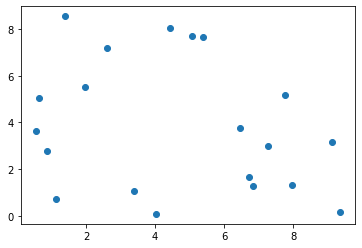

In [4]:
## Generating the points for the villages
import random

random.seed(4175)

x = []
y = []
for i in range(20):
    x.append(random.uniform(0, 10))
    y.append(random.uniform(0, 10))

# Plot villages
plt.scatter(x, y)
plt.show()

In [5]:
import cvxpy as cp
import cvxopt

# Define variables
x_stn = cp.Variable(name="x_stn")
y_stn = cp.Variable(name="y_stn")
t = cp.Variable(name="t")

objective = cp.Minimize(t)

# Creating constraints. I'm sure there's a better way to do this :)
constraints =  [cp.norm((x_stn-x[0]) + (y_stn-y[0]), 2) <= t,
                cp.norm((x_stn-x[1]) + (y_stn-y[1]), 2) <= t,
                cp.norm((x_stn-x[2]) + (y_stn-y[2]), 2) <= t,
                cp.norm((x_stn-x[3]) + (y_stn-y[3]), 2) <= t,
                cp.norm((x_stn-x[4]) + (y_stn-y[4]), 2) <= t,
                cp.norm((x_stn-x[5]) + (y_stn-y[5]), 2) <= t,
                cp.norm((x_stn-x[6]) + (y_stn-y[6]), 2) <= t,
                cp.norm((x_stn-x[7]) + (y_stn-y[7]), 2) <= t,
                cp.norm((x_stn-x[8]) + (y_stn-y[8]), 2) <= t,
                cp.norm((x_stn-x[9]) + (y_stn-y[9]), 2) <= t,
                cp.norm((x_stn-x[10]) + (y_stn-y[10]), 2) <= t,
                cp.norm((x_stn-x[11]) + (y_stn-y[11]), 2) <= t,
                cp.norm((x_stn-x[12]) + (y_stn-y[12]), 2) <= t,
                cp.norm((x_stn-x[13]) + (y_stn-y[13]), 2) <= t,
                cp.norm((x_stn-x[14]) + (y_stn-y[14]), 2) <= t,
                cp.norm((x_stn-x[15]) + (y_stn-y[15]), 2) <= t,
                cp.norm((x_stn-x[16]) + (y_stn-y[16]), 2) <= t,
                cp.norm((x_stn-x[17]) + (y_stn-y[17]), 2) <= t,
                cp.norm((x_stn-x[18]) + (y_stn-y[18]), 2) <= t,
                cp.norm((x_stn-x[19]) + (y_stn-y[19]), 2) <= t,
               x_stn >= 0,
               y_stn >= 0,
               x_stn <= 10,
               y_stn <= 10]

problem = cp.Problem(objective, constraints)

print("The minimum longest distance between the fire station and villages is: " + str(problem.solve()))
print("The coordinates of the fire station are is: [" + str(x_stn.value) + ", " +str(y_stn.value) + "]" )

The minimum longest distance between the fire station and villages is: 5.600455467259536
The coordinates of the fire station are is: [3.725579377461414, 3.725579377504314]


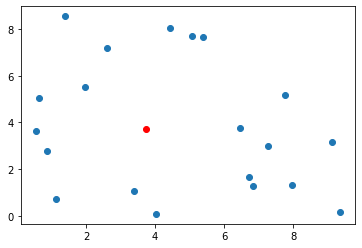

In [6]:
plt.scatter(x, y)
plt.scatter(x_stn.value, y_stn.value, color = 'r')
plt.show()